# Jupyter Workshop

$\vphantom{.}$
### PIMS Young Researcher Conference

### University of Saskatchewan


### June 6, 2017


$\vphantom{.}$
## Michael P. Lamoureux
### PIMS Innovation Coordinator


Outline of this workshop
- What is the PIMS Syzygy.ca service?
- What is a Jupyter Notebook?
- How to use Jupyter in your work.

Want to play along today? Try any of these sites:
- USask people [usask.syzygy.ca](https://usask.syzygy.ca)
- Everyone else [pims.syzygy.ca](https://pims.syzygy.ca)
- Cybera machine [cybera.syzygy.ca](https://cybera.syzygy.ca) 
- General [try.jupyter.org](http://try.jupyter.org) 


# PIMS Syzygy.ca Service

- write, run, and store your code on the cloud
- access through a browser, share with collaborators
- PIMS making this widely available

- joint project supported by PIMS, Compute Canada and Cybera (Alberta)
- organized through PIMS personnel (esp. Ian Allison)
- login through your local university
- IT support via the Web

- 1 to 2 cores per user, 1-2 Gigs storage
- 1000 cores and storage for the whole project
- goal is to offer to all researchers in Canada
- starting with PIMS university sites, now expanding beyoun

# Using it in your work

- based on Jupyter notebooks
- text based on the Markdown language, TeX built in
- computation in Python, R, Julia
- Fortran, C/C++ accessible, other languages can be made available
- use git for version control and sharing

## What is a Jupyter notebook?

- combines text, math formulas, and active computer code.

- includes rich display: slideshows, animations, videos, etc

- builds on the languages Julia, Python, R and more

- friendly interface through an browser (Chrome, Firefox, etc)

- runs smoothly over the internet, or on your laptop

## Use Markdown language
- for plain text, headers, even slideshows (like this one!)

- to make lists, insert math: $F(x) = \int_0^x f(s) ds$, format text

- insert *italics* and **bold** for emphasis, even quotations: 
>To-morrow, and to-morrow, and to-morrow,
>Creeps in this petty pace from day to day,
>To the last syllable of recorded time.

Uses Latex code to make proper mathematical formulas.

%%latex
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{i}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

In [1]:
%matplotlib inline

In [2]:
from pylab import *

We can use Python for simple calculations

In [3]:
2+2

4

In [4]:
sin(.1)

0.099833416646828155

We can use Pandas in Python for data analytics
- e.g. using public data sources from gov't and industry

### NSERC Awards Data -- total funding
<img src="NSERC_plot.png" width="600" height="600" />




### NSERC Awards Data -- total funding
<img src="NSERC_pie.png" width="600" height="600" />

We can use Matplotlib for plotting 

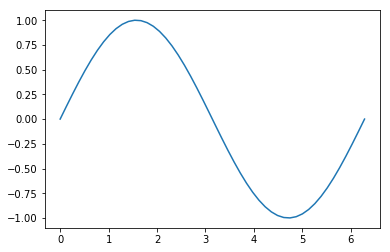

In [5]:
x=linspace(0,2*pi)
y=sin(x)
plot(x,y)

In [6]:
from matplotlib import animation, rc
from IPython.display import HTML

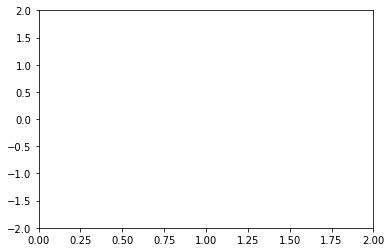

In [7]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [8]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [9]:
# animation function. This is called sequentially
def animate(i):
    x = linspace(0, 2, 1000)
    y = sin(2 * pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [10]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

With a bit of code, we can have animated graphs

In [11]:
HTML(anim.to_html5_video())

Generate sound algorithmically, and play it. 

In [12]:
from IPython.display import Audio

In [13]:
Fs = 8000.0
Len = 3
t = linspace(0,Len,Fs*Len)
f1 = 442.0
f2 = 440.0
signal = sin(2*pi*f1*t) + sin(2*pi*f2*t)

Audio(data=signal, rate=Fs)

With a few lines, we can include YouTube videos

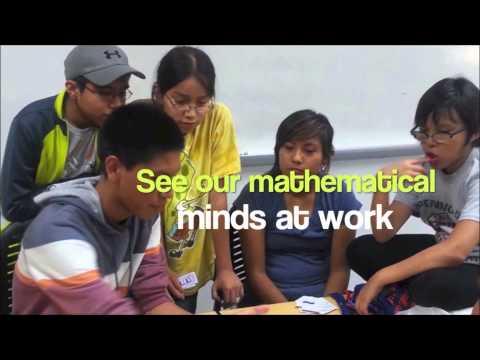

In [14]:
from IPython.display import YouTubeVideo
# Navjo Math Circles - Tatiana Shubin
YouTubeVideo('nrNV7oVK_Eg')

We can include dynamic, interactive simulations, with just a little code.

I poached what follows this from Jim, who got it from here:
https://github.com/skariel/IPython_d3_js_demo/blob/master/d3_js_demo.ipynb

In [15]:
%%writefile f1.template
<!DOCTYPE html>
<html>
    <meta http-equiv="Content-Type" content="text/html;charset=utf-8"/>
    <script type="text/javascript" src="https://mbostock.github.io/d3/talk/20111018/d3/d3.js"></script>
    <script type="text/javascript" src="https://mbostock.github.io/d3/talk/20111018/d3/d3.geom.js"></script>
    <script type="text/javascript" src="https://mbostock.github.io/d3/talk/20111018/d3/d3.layout.js"></script>
    <style type="text/css">

circle {
  stroke: #000;
  stroke-opacity: .5;
}

    </style>
  <body>
    <div id="body">
    <script type="text/javascript">

var w = {width},
    h = {height};

var nodes = d3.range({ball_count}).map(function() { return {radius: Math.random() * {rad_fac} + {rad_min}}; }),
    color = d3.scale.category10();

var force = d3.layout.force()
    .gravity(0.1)
    .charge(function(d, i) { return i ? 0 : -2000; })
    .nodes(nodes)
    .size([w, h]);

var root = nodes[0];
root.radius = 0;
root.fixed = true;

force.start();

var svg = d3.select("#body").append("svg:svg")
    .attr("width", w)
    .attr("height", h);

svg.selectAll("circle")
    .data(nodes.slice(1))
  .enter().append("svg:circle")
    .attr("r", function(d) { return d.radius - 2; })
    .style("fill", function(d, i) { return color(i % {color_count}); });

force.on("tick", function(e) {
  var q = d3.geom.quadtree(nodes),
      i = 0,
      n = nodes.length;

  while (++i < n) {
    q.visit(collide(nodes[i]));
  }

  svg.selectAll("circle")
      .attr("cx", function(d) { return d.x; })
      .attr("cy", function(d) { return d.y; });
});

svg.on("mousemove", function() {
  var p1 = d3.svg.mouse(this);
  root.px = p1[0];
  root.py = p1[1];
  force.resume();
});

function collide(node) {
  var r = node.radius + 16,
      nx1 = node.x - r,
      nx2 = node.x + r,
      ny1 = node.y - r,
      ny2 = node.y + r;
  return function(quad, x1, y1, x2, y2) {
    if (quad.point && (quad.point !== node)) {
      var x = node.x - quad.point.x,
          y = node.y - quad.point.y,
          l = Math.sqrt(x * x + y * y),
          r = node.radius + quad.point.radius;
      if (l < r) {
        l = (l - r) / l * .5;
        node.x -= x *= l;
        node.y -= y *= l;
        quad.point.x += x;
        quad.point.y += y;
      }
    }
    return x1 > nx2
        || x2 < nx1
        || y1 > ny2
        || y2 < ny1;
  };
}

    </script>
  </body>
</html>

Writing f1.template


In [16]:
from IPython.display import IFrame
import re

def replace_all(txt,d):
    rep = dict((re.escape('{'+k+'}'), str(v)) for k, v in d.items())
    pattern = re.compile("|".join(rep.keys()))
    return pattern.sub(lambda m: rep[re.escape(m.group(0))], txt)    

count=0
def serve_html(s,w,h):
    import os
    global count
    count+=1
    fn= '__tmp'+str(os.getpid())+'_'+str(count)+'.html'
    with open(fn,'w') as f:
        f.write(s)
    return IFrame('files/'+fn,w,h)

def f1(w=500,h=400,ball_count=150,rad_min=2,rad_fac=11,color_count=3):
    d={
       'width'      :w,
       'height'     :h,
       'ball_count' :ball_count,
       'rad_min'    :rad_min,
       'rad_fac'    :rad_fac,
       'color_count':color_count
       }
    with open('f1.template','r') as f:
        s=f.read()
    s= replace_all(s,d)        
    return serve_html(s,w+30,h+30)

In [27]:
# Moving ball simulation
f1(ball_count=50, color_count=17, rad_fac=10, rad_min=3, w=600)

TypeError: 'float' object is not callable

We do serious computation, with high resolution graphics **within** the Notebook.

- the spectra of the almost Mathieu operators

- the wings of the resulting butterflies

### Spectra of the almost Mathieu operators
<img src="mathieu.svg" width="500" height="500" />

### Wings of the resulting butterflies
<img src="ButterflyRedBlue25.png" width="500" height="500" />

Using Jupyter for Coursework

- write your own eBook, with links to Jupyter

https://mlamoureux.gitbooks.io/signal-processing-lecture-notes/content/

- Use someone else's eBook with Jupyter (UC Berkeley)

http://www.inferentialthinking.com/

- Create your own Lecture Notes and code in Jupyter

https://github.com/mlamoureux/Math651



# PIMS Jupyter Computational Service

- write, run, and store your code on the cloud
- access through a browser
- plans to make it widely available

- supported by Compute Canada's hardware
- organized through PIMS admin (Ian Allison)
- login through your local university
- local IT support at each site

- 1 to 2 cores per user, 1-2 Gigs storage
- 1000 cores and storage for the whole project
- goal is to offer to all researchers in Canada
- starting with PIMS university sites

# Using it in your work

- markdown language, TeX built in
- choices of Python, R, Julia for computation
- in principle, other languages can be made available
- use git for version control and sharing

### Demos in math:
- Spectra 
https://pims.jupyter.ca/user/mplamour/notebooks/cms-demo/MathieuSpectra.ipynb

- Bokeh plotting 
https://pims.jupyter.ca/user/mplamour/notebooks/cms-demo/bokeh-plotting-with-parameters.ipynb

- PDE waves 
https://pims.jupyter.ca/user/mplamour/notebooks/cms-demo/WaveSolver.ipynb


### Demos for math, or fun:
- ODE solver (imported from Fortran) 
https://jupyter.pims.math.ca/user/mplamour/notebooks/cms-demo/ODEtests.ipynb

- mouse tracking 
https://jupyter.pims.math.ca/user/mplamour/notebooks/cms-demo/Exp6_FFTofCanvas.ipynb

- Drawing app 
https://jupyter.pims.math.ca/user/mplamour/notebooks/cms-demo/Together_test.ipynb

### Demos in data analysis:
- NSERC data 
https://pims.jupyter.ca/user/mplamour/notebooks/cms-demo/NSERCAwardsS3-JC.ipynb

- Job openings in BC
https://pims.jupyter.ca/user/mplamour/notebooks/cms-demo/labour_market_plot.ipynb

- Stock Market Data
https://pims.jupyter.ca/user/mplamour/notebooks/cms-demo/Stock_analysis.ipynb


### More demos:

- Watson image analysis
https://pims.jupyter.ca/user/mplamour/notebooks/cms-demo/watson-image-analysis.ipynb

- Making slides
http://www.slideviper.oquanta.info/tutorial/slideshow_tutorial_slides.html#/


## Some quick notes on Fourier series

Fourier came up with the idea of expanding functions as sums of sines and cosines.

He wasn't  interested in just any functions. 

He was interested in solved certain differential equations -- usually the heat equation, which was important for drilling cannons (the cannon and drill get really hot), and for hiking around Egypt (Fourier was also an archeologist). 


But let's look at the wave equation: 
$$\frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial x^2} \mbox{ where } u = u(x,t).$$

Fourier realized if $u$ was the product of two sines, the 2nd derivative w.r.t. t would bring back a minus sin, as would the 2nd derivative w.r.t. x. So something like this would be a solution:

$$u(x,t) = \sin(x)\sin(t).$$

With just a bit of code, we can plot this waveform as a spatial function that moves with time.

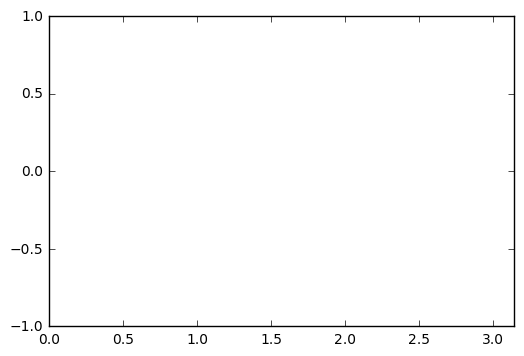

In [6]:
# Standing wave - fundamental
#First set up the figure, the axis, and the plot element we want to animate
fig = figure()
ax = axes(xlim=(0, np.pi), ylim=(-1, 1))
line, = plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = linspace(0, pi, 1000)
    y = sin(x)*sin(2*pi*i*.01)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim=animation.FuncAnimation(fig, animate, init_func=init,
                               frames=101, interval=20, blit=True)



In [7]:
#The fundamental solution
HTML(anim.to_html5_video())

Of course, other solutions are possible, such as
$$u(x,t) = \sin(2x)\sin(2t)$$

This is a standing wave that moves twice as fast, with twice the bumps.

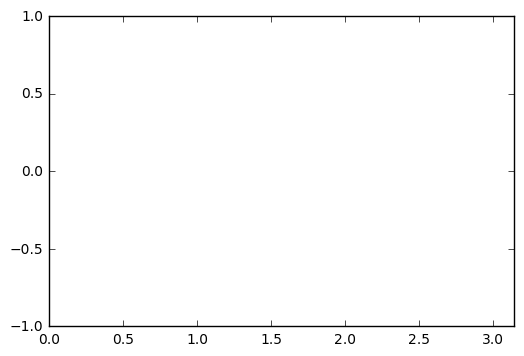

In [8]:
# Standing wave, 2nd harmonic
# First set up the figure, the axis, and the plot element we want to animate
fig = figure()
ax = axes(xlim=(0, pi), ylim=(-1, 1))
line, = plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = linspace(0, pi, 1000)
    y = sin(2*x)*sin(2*2*pi*i*.01)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim=animation.FuncAnimation(fig, animate, init_func=init,
                               frames=101, interval=20, blit=True)

In [9]:
# The second harmonic
HTML(anim.to_html5_video())

Any integer multple in the sinusoids will work, satisfying the zero boundary conditions.

$$u(x,t) = \sin(n\cdot x)\sin(n\cdot t)$$

It moves faster, with more bumps.

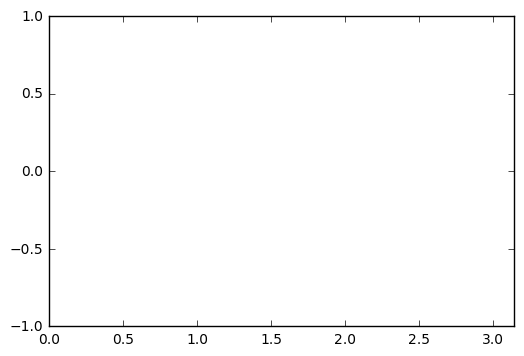

In [10]:
# 5th harmonic
# First set up the figure, the axis, and the plot element we want to animate
fig = figure()
ax = axes(xlim=(0, pi), ylim=(-1, 1))
line, = plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = linspace(0, pi, 1000)
    y = sin(5*x)*sin(5*2*pi*i*.01)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim=animation.FuncAnimation(fig, animate, init_func=init,
                               frames=101, interval=20, blit=True)

In [11]:
# The fifth harmonic
HTML(anim.to_html5_video())

Any linear combination of these sinusoids will also be a solutons.

Helmholtz noted that the vibrations of a violin string (under bowing) is given in the form:

$$ u(x,t) = \sum_n \frac{1}{n^2} \sin(nx)\sin(nt)$$

What is surprising is how this motion looks -- a piecewise linear string with a moving corner.

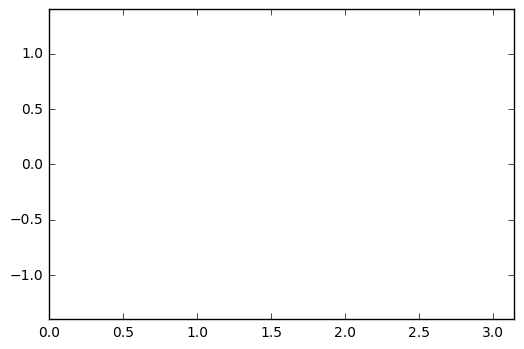

In [12]:
# A sum of harmonics, weights 1/n**2
# First set up the figure, the axis, and the plot element we want to animate
fig = figure()
ax = axes(xlim=(0, pi), ylim=(-1.4, 1.4))
line, = plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = linspace(0, pi, 1000)
    y = 0*x
    for k in range(1,100):
        y += (1.0/k**2)*sin(k*x)*sin(k*2*pi*i*.01)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim=animation.FuncAnimation(fig, animate, init_func=init,
                               frames=501, interval=20, blit=True)

In [13]:
HTML(anim.to_html5_video())

In [14]:
# And here is what it sounds like
Srate = 44100.0
Slen = 5
tt = linspace(0,Slen,Srate*Slen)
f1 = 440.0
signal = 0*tt
for n in range(1,21):
    signal += sin(2*pi*n*f1*tt)/n**3
    
Audio(data=signal, rate=Srate)

## More demos?

https://jupyter.pims.math.ca/user/mplamour/tree

## Thank you for your attention

## Thank you to Compute Canada, Mitacs, NSERC 

Here is a handy guide for using GIT, in case Michael forgets!
http://rogerdudler.github.io/git-guide/

In [27]:
#from notebook.services.config import ConfigManager
#cm = ConfigManager()
#cm.update('livereveal', {
#              'theme': 'simple',
#              'transition': 'linear',
#              'start_slideshow_at': '1',
#})

{'start_slideshow_at': '1', 'theme': 'simple', 'transition': 'linear'}